## Data Wrangling

### Load the data

In [70]:
# Import the necessary library
import numpy as np
import pandas as pd
import datetime
import requests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from pathlib import Path
import glob
import os

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore")

<font color='teal'>**Set your working directory correctly**</font>

In [2]:
os.getcwd()

'C:\\Users\\Amit Jain'

In [3]:
path = 'C:\\BASF\\sensor_data'

os.chdir(path)

<font color='teal'>**Read the CSV file into pandas dataframes**</font>

In [4]:
df = pd.read_csv('sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [5]:
df.shape

(220320, 55)

In [6]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:
df.tail()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [8]:
del df['Unnamed: 0']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

#### Exploratory Data Analysis

In [10]:
df.nunique()

timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_15              0
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898
sensor_38            602


In [11]:
# count the unique values of machine_status
df['machine_status'].value_counts(dropna=False).head()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [12]:
# count the unique values of sensor_15
df['sensor_15'].value_counts(dropna=False).head()

NaN    220320
Name: sensor_15, dtype: int64

<font color='teal'>**summary statistics**</font>

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


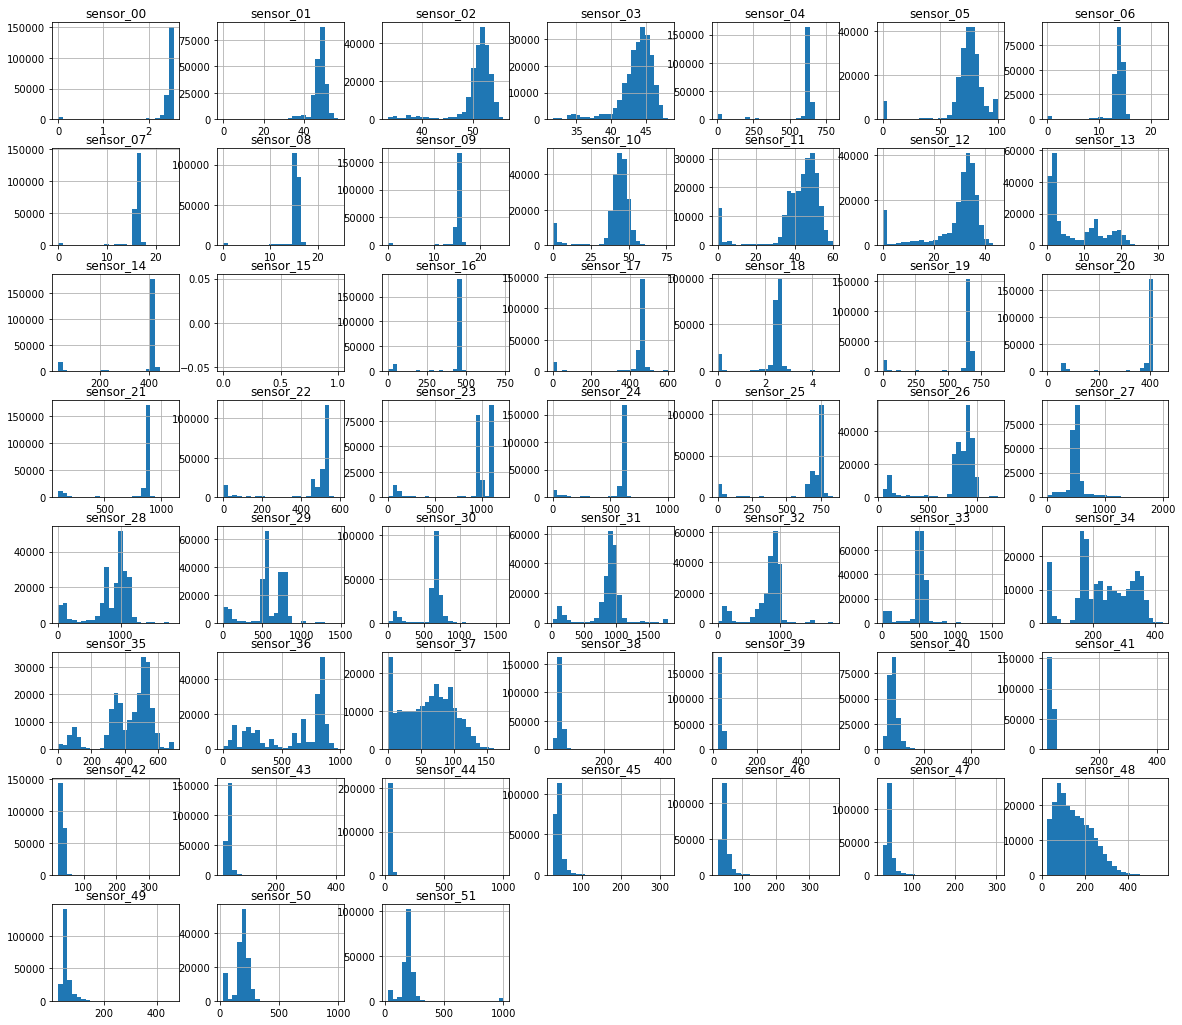

In [14]:
# Histogram
df.hist(df.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

#### Clean the data

<font color='teal'>**Remove duplicates from the dataframe**</font>

In [15]:
# Drop duplicates
df = df.drop_duplicates()

In [16]:
df.shape

(220320, 54)

<font color='teal'>**Handle Missing Values**</font>

In [17]:
# Entire "sensor_15" column is NaN therefore removing the entire column from the data set
del df['sensor_15']

In [18]:
df.shape

(220320, 53)

In [19]:
df.isnull()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

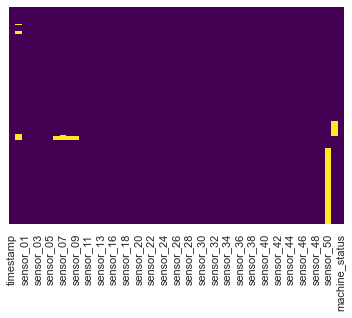

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.isnull().sum().sort_values(ascending=False)

sensor_50         77017
sensor_51         15383
sensor_00         10208
sensor_07          5451
sensor_08          5107
sensor_06          4798
sensor_09          4595
sensor_01           369
sensor_30           261
sensor_29            72
sensor_32            68
sensor_17            46
sensor_18            46
sensor_22            41
sensor_25            36
sensor_16            31
sensor_49            27
sensor_48            27
sensor_47            27
sensor_46            27
sensor_45            27
sensor_44            27
sensor_43            27
sensor_42            27
sensor_41            27
sensor_40            27
sensor_39            27
sensor_38            27
sensor_14            21
sensor_26            20
sensor_03            19
sensor_10            19
sensor_13            19
sensor_12            19
sensor_11            19
sensor_05            19
sensor_04            19
sensor_02            19
sensor_36            16
sensor_37            16
sensor_28            16
sensor_27       

In [30]:
df.isnull().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

In [31]:
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [27]:
#missing_percentage = df.isnull().sum() /df.shape[0] * 100
#missing_percentage

In [28]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

In [29]:
calc_percent_NAs(df)

,percent
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327


In [32]:
cols_num = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51']

df[cols_num] = df[cols_num].fillna(df[cols_num].mean())

In [35]:
df.isnull().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [36]:
df.shape

(220320, 53)

In [41]:
df.head(2)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date
0,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
1,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00


<font color='teal'>**Convert data types to the correct data type**</font>

In [40]:
# Let's convert the data type of timestamp column to datatime format

df['date'] = pd.to_datetime(df['timestamp'])
del df['timestamp']

In [42]:
df = df.set_index('date')
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       220320 non-null  float64
 1   sensor_01       220320 non-null  float64
 2   sensor_02       220320 non-null  float64
 3   sensor_03       220320 non-null  float64
 4   sensor_04       220320 non-null  float64
 5   sensor_05       220320 non-null  float64
 6   sensor_06       220320 non-null  float64
 7   sensor_07       220320 non-null  float64
 8   sensor_08       220320 non-null  float64
 9   sensor_09       220320 non-null  float64
 10  sensor_10       220320 non-null  float64
 11  sensor_11       220320 non-null  float64
 12  sensor_12       220320 non-null  float64
 13  sensor_13       220320 non-null  float64
 14  sensor_14       220320 non-null  float64
 15  sensor_16       220320 non-null  float64
 16  sensor_17       220320

In [ ]:
## EDA

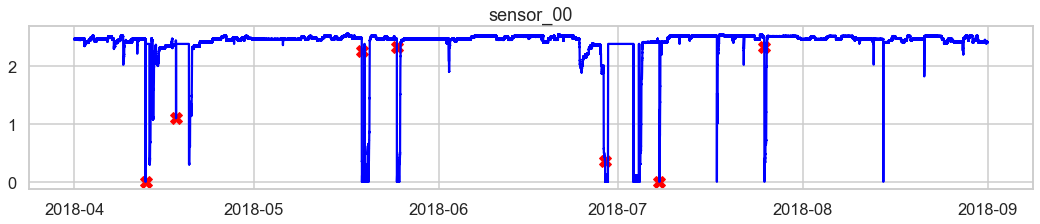

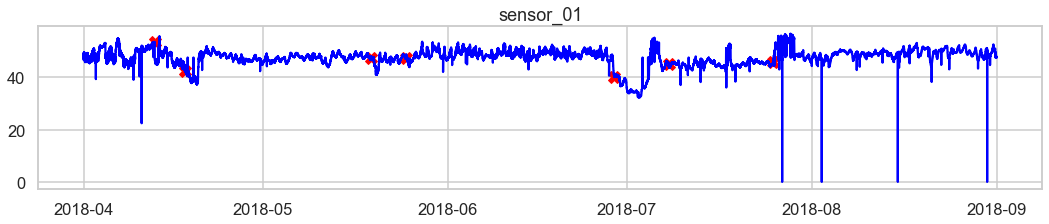

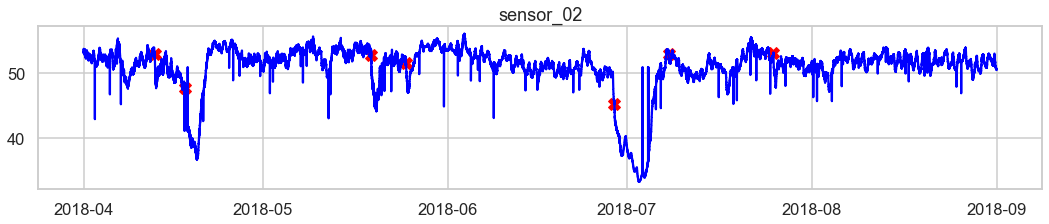

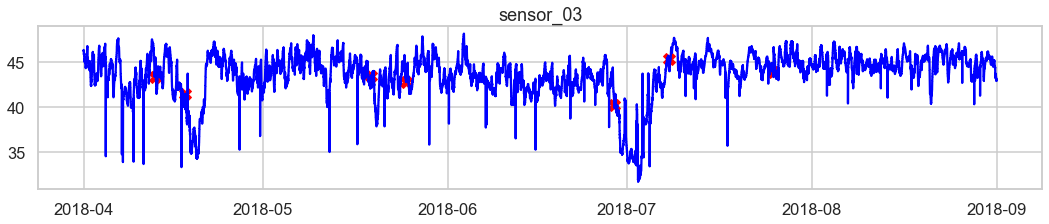

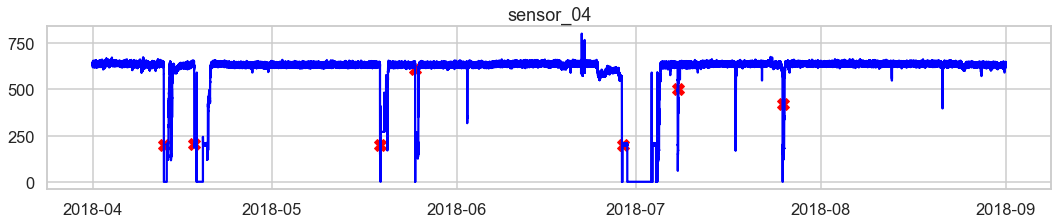

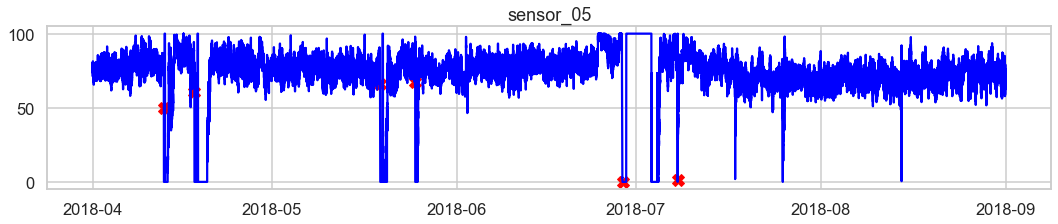

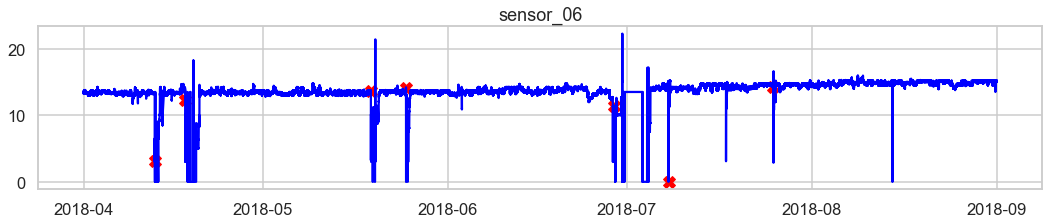

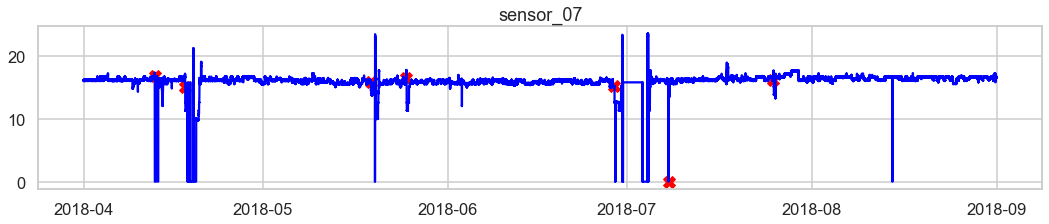

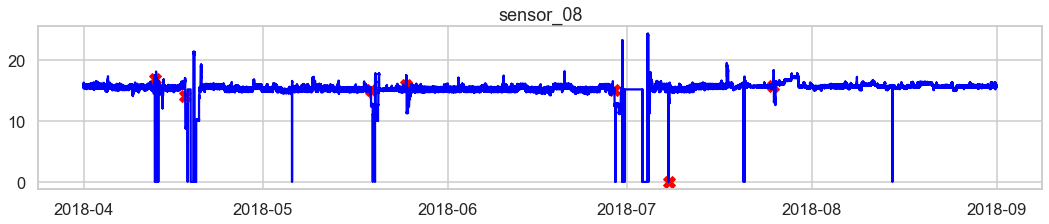

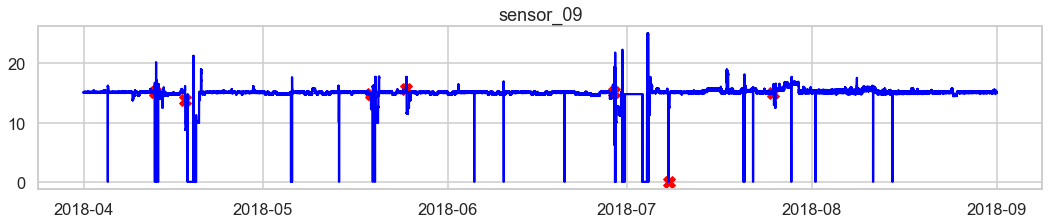

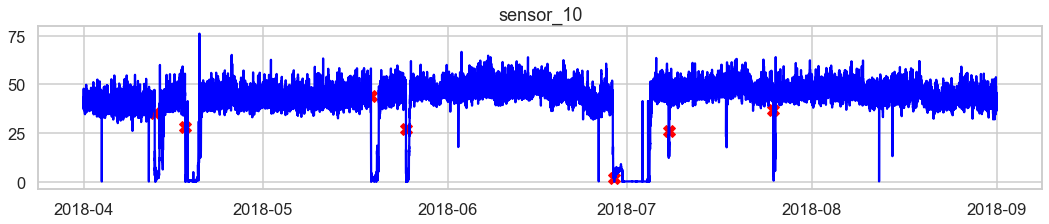

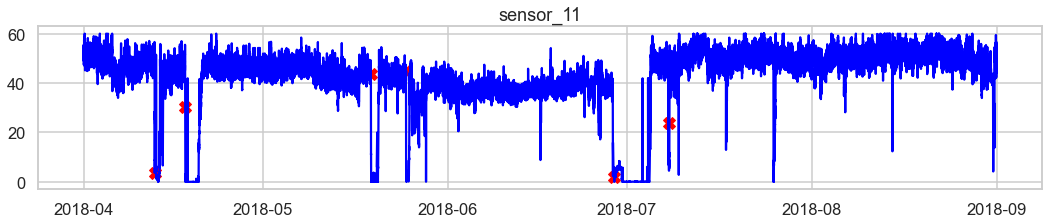

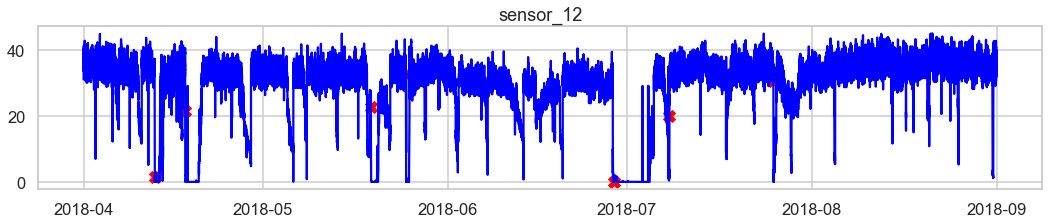

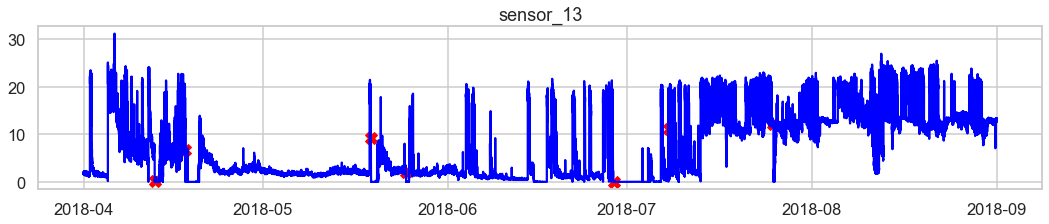

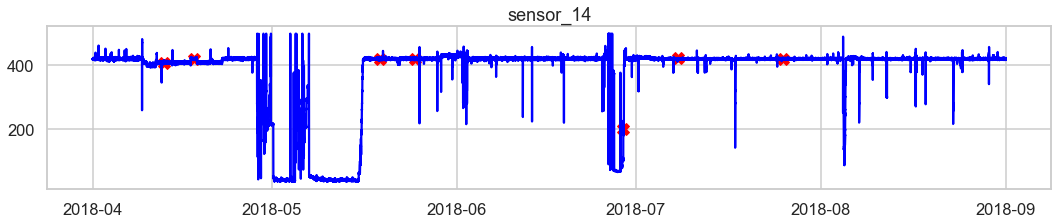

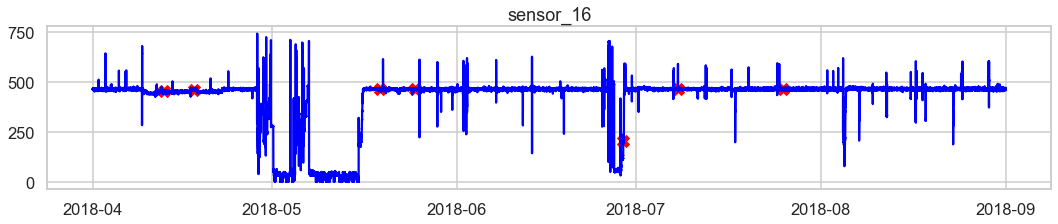

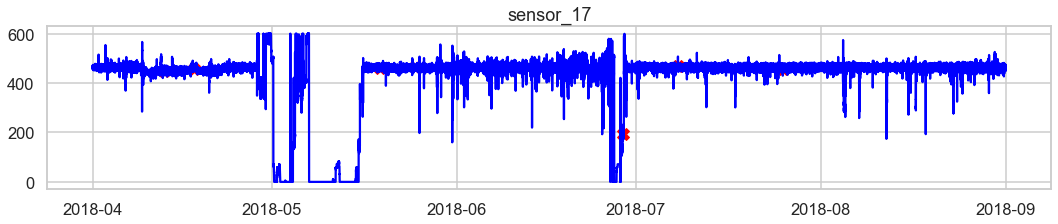

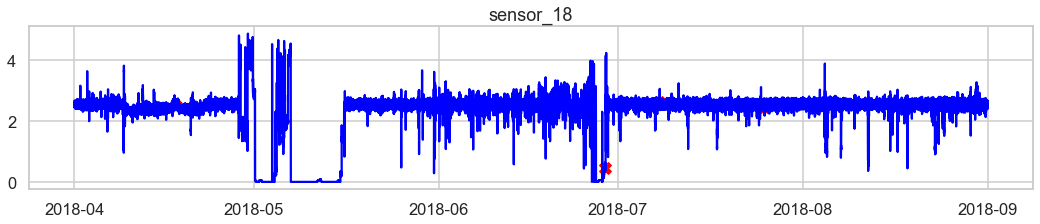

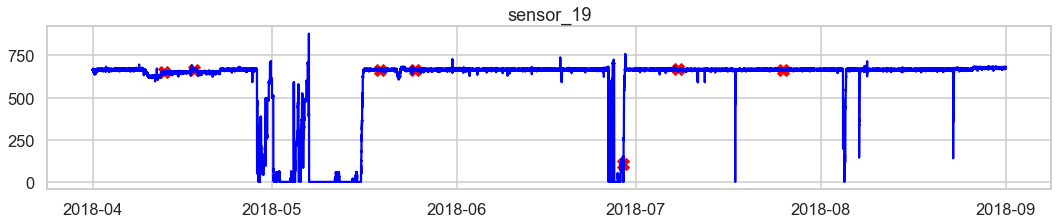

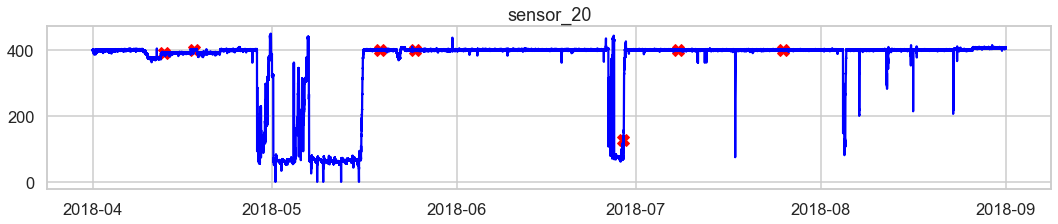

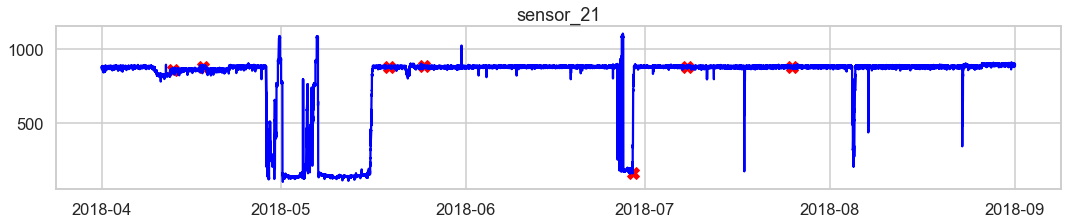

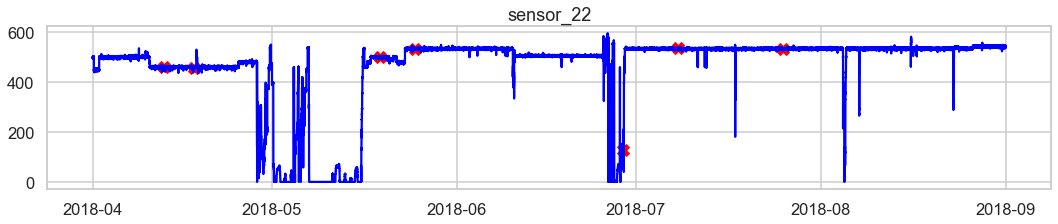

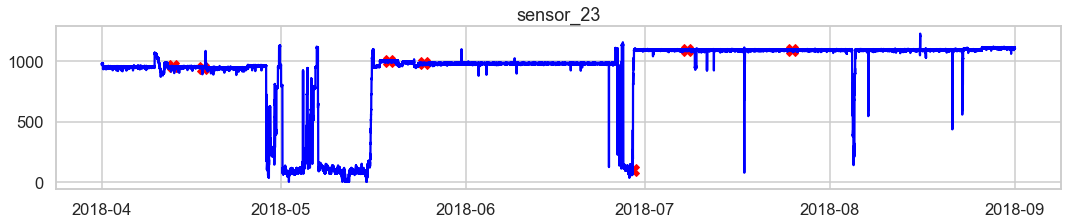

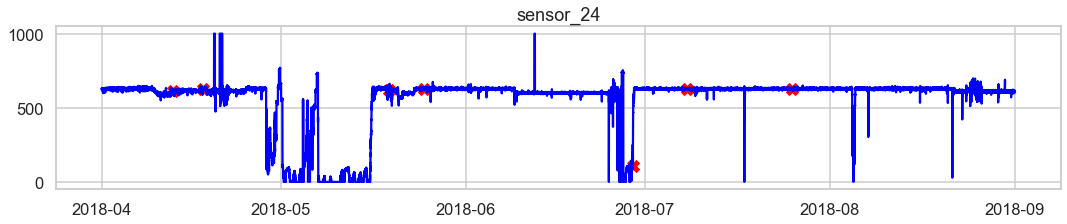

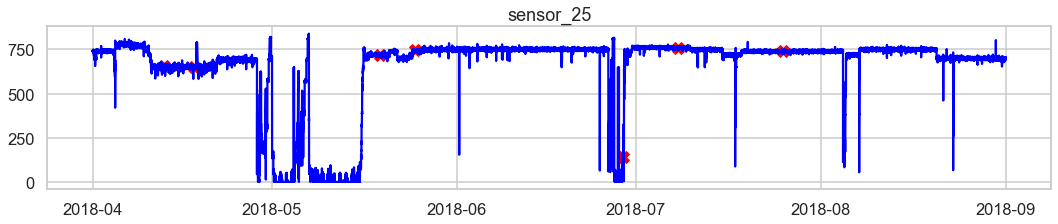

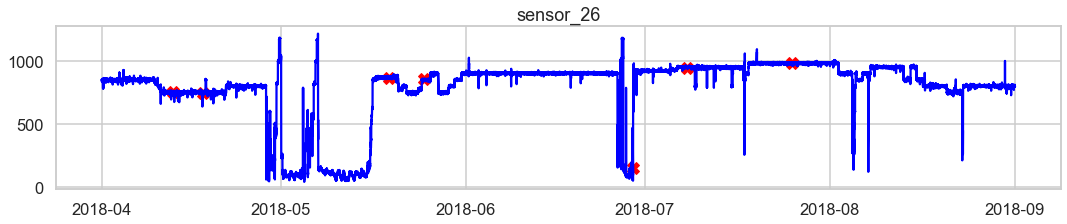

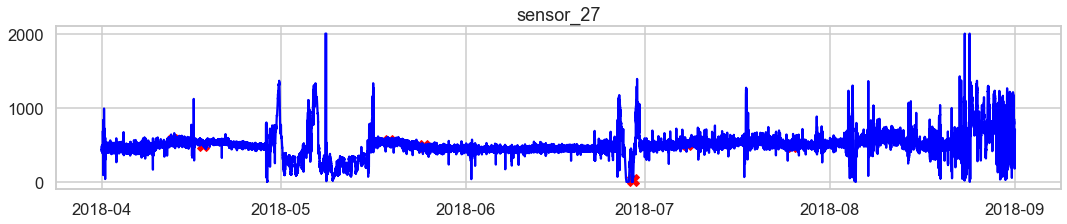

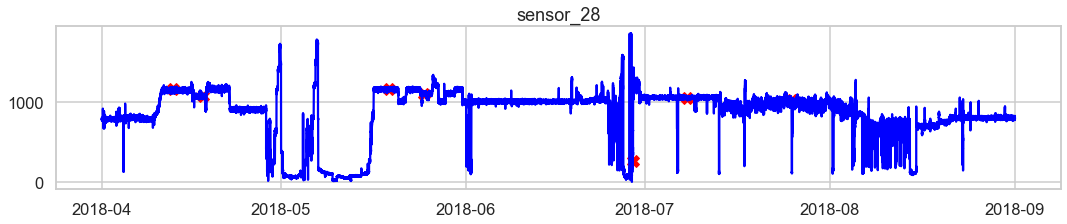

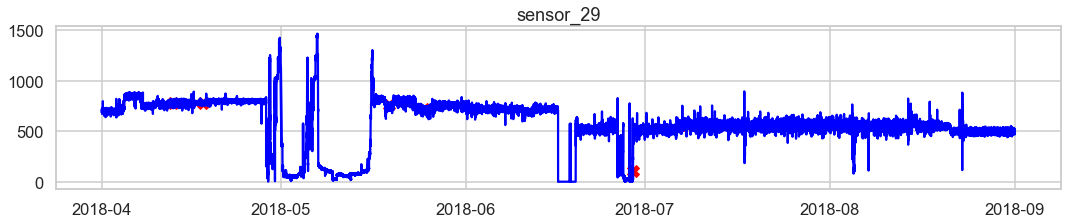

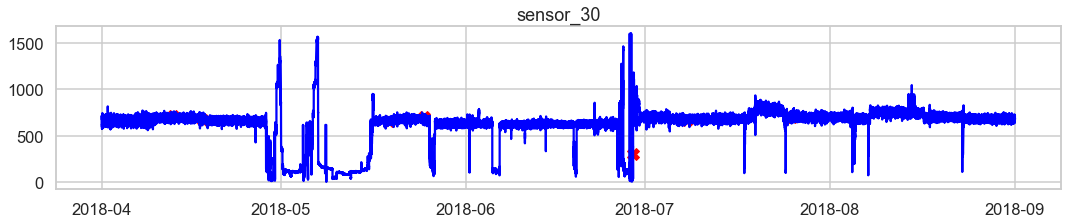

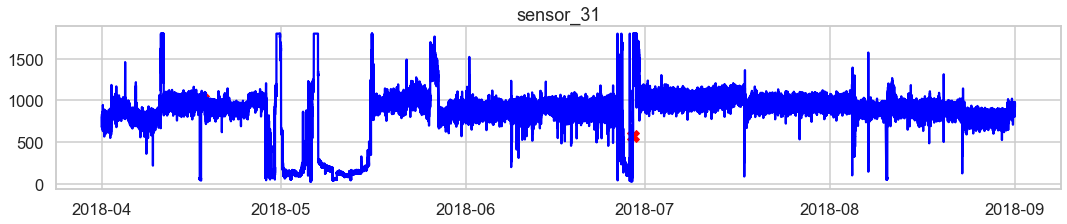

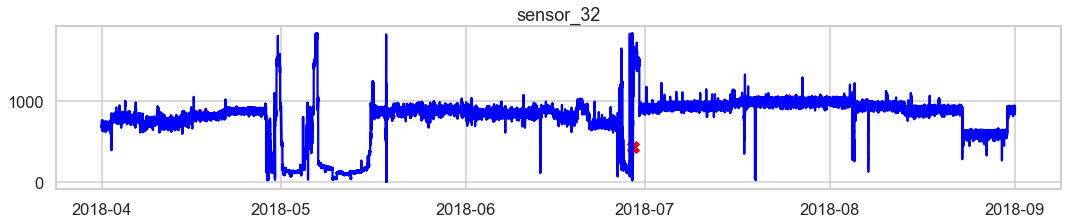

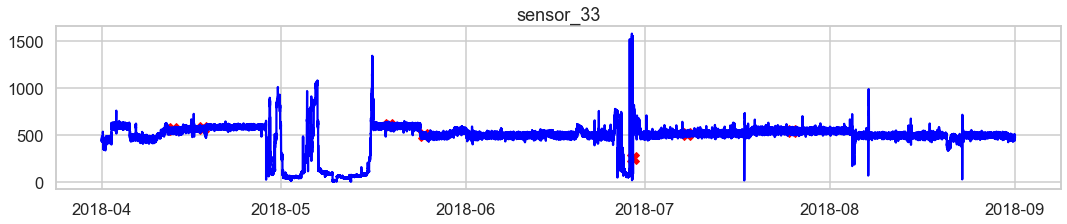

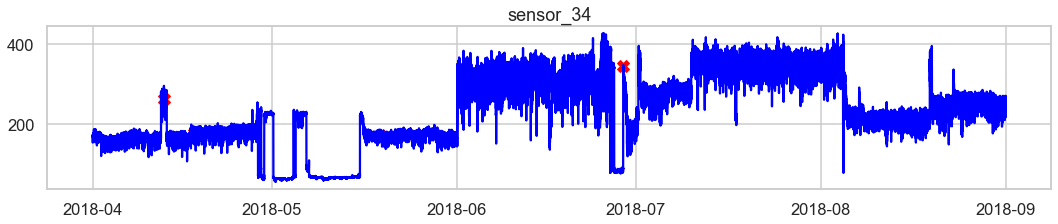

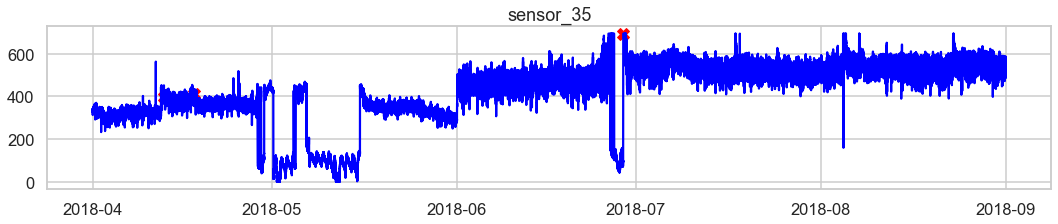

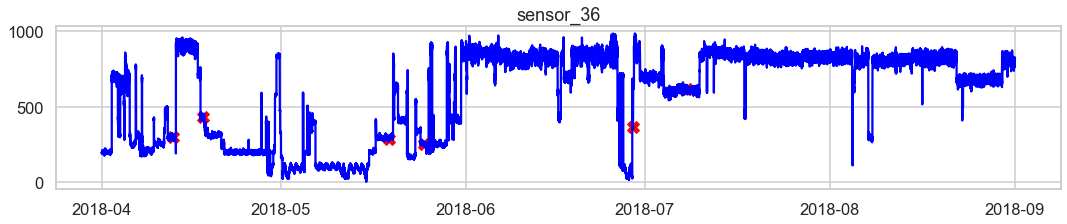

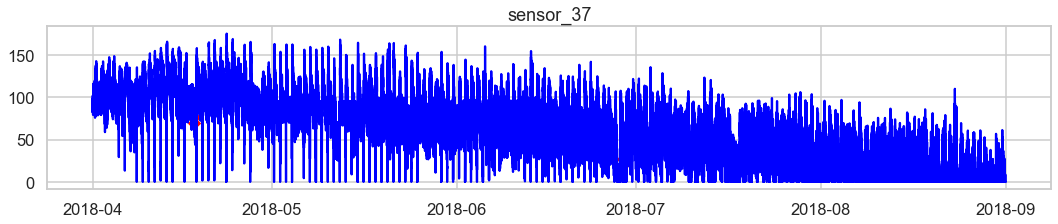

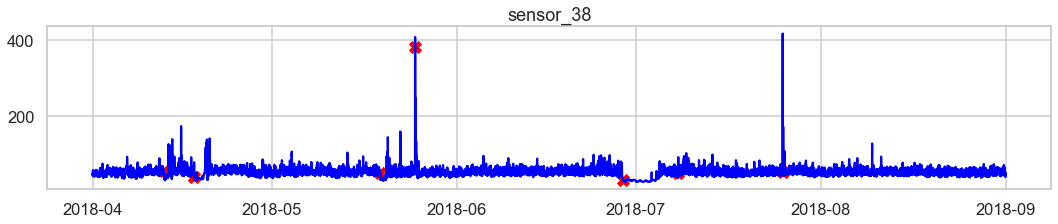

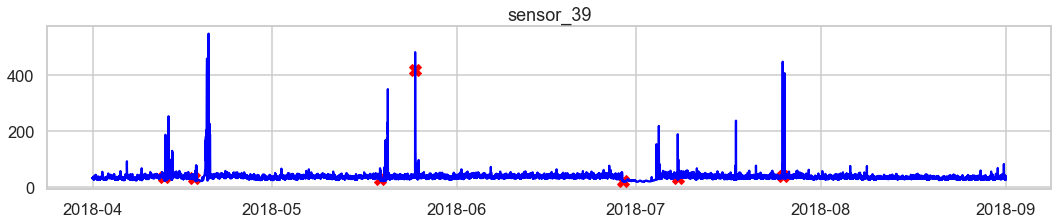

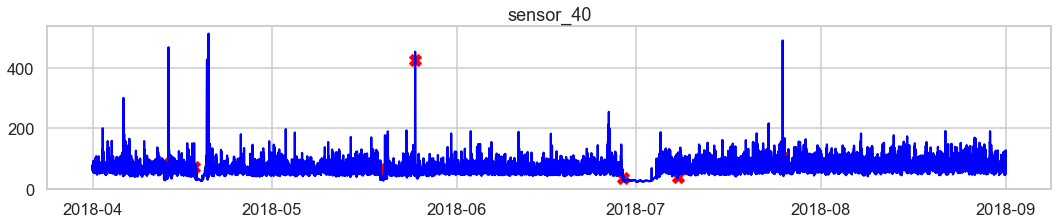

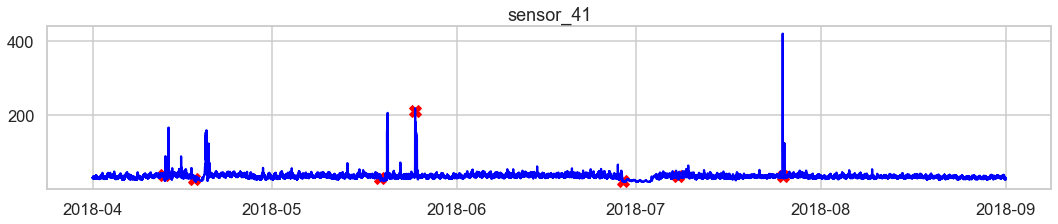

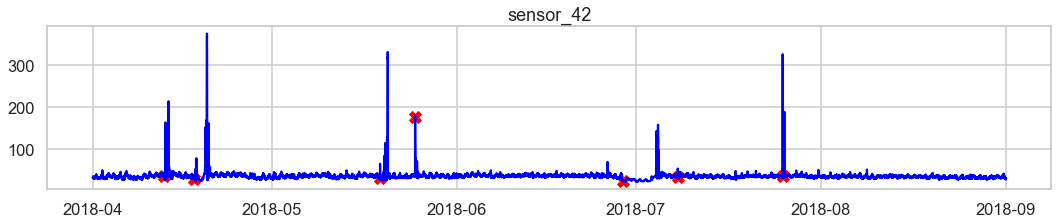

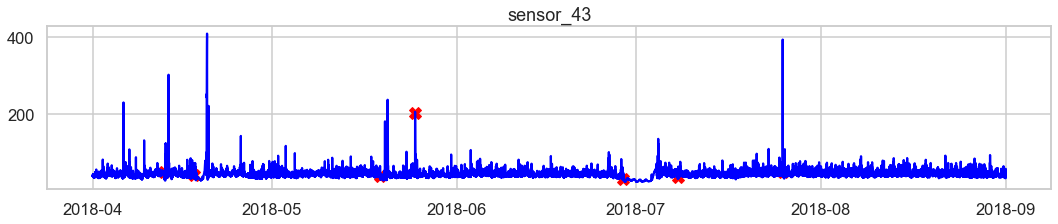

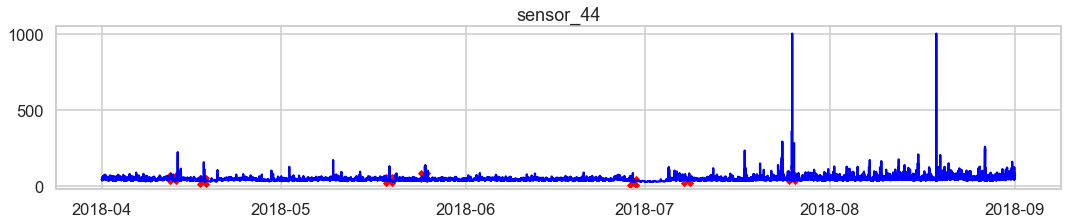

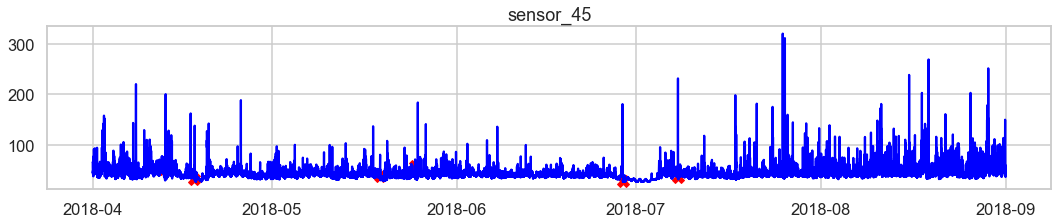

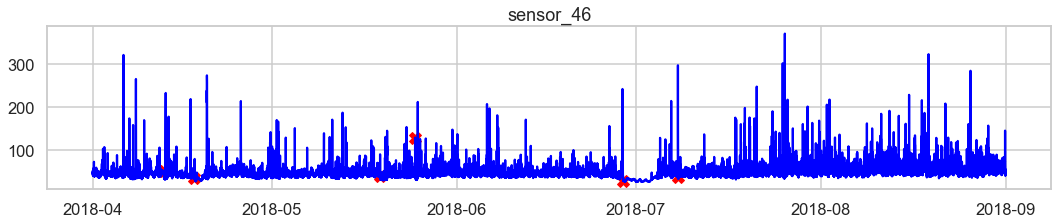

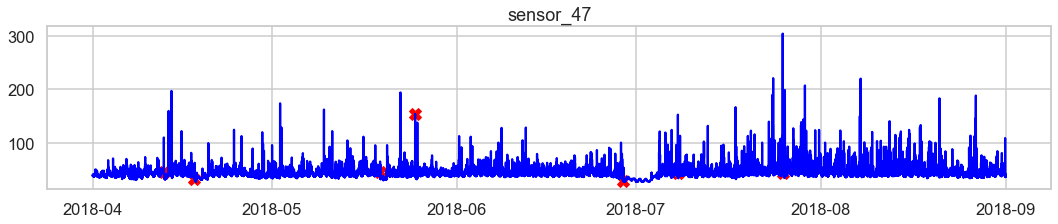

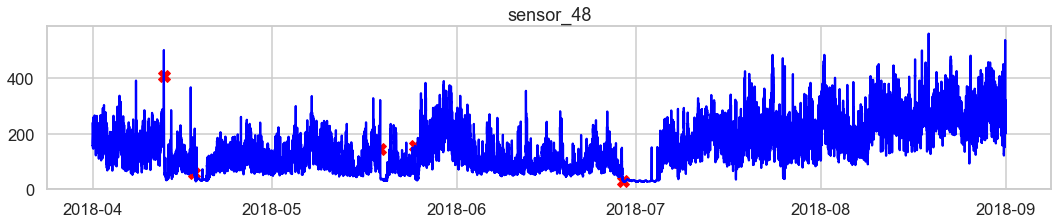

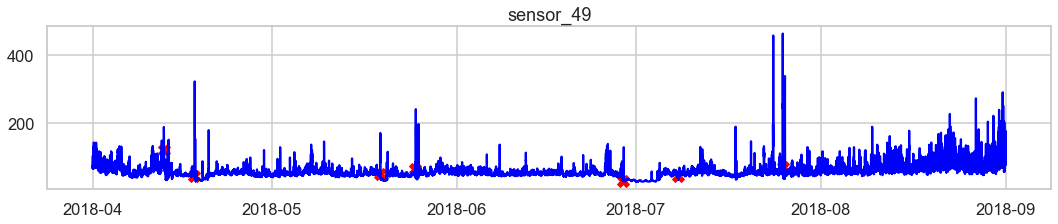

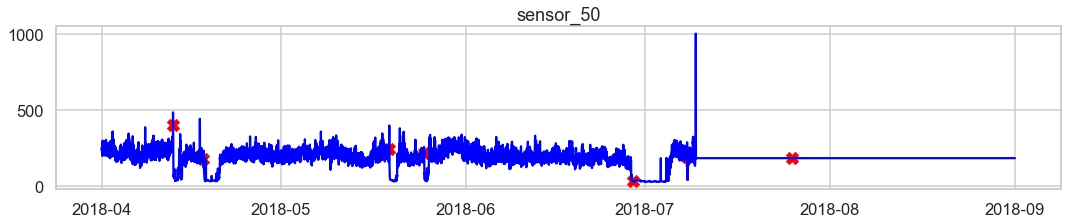

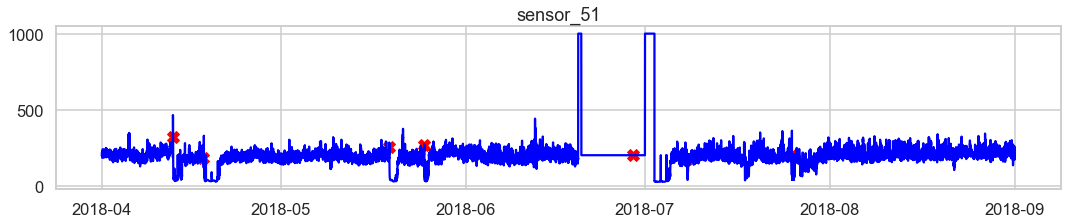

In [44]:
# Vizualize time series and the BROKEN state (red dots) in the same graph for each sensor

# Extract the readings from BROKEN state and resample by daily average
broken = df[df['machine_status']=='BROKEN']

# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns

# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

<font color='teal'>**outlier detection**</font>

In [49]:
# Extract numerical columns only
df = df.drop(['machine_status'], axis=1)

In [50]:
# retrieve the array
data = df.values

In [51]:
data

array([[  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.444734  ,  47.35243   ,  53.2118    , ...,  67.12963   ,
        241.3194    , 203.7037    ],
       ...,
       [  2.396528  ,  47.69964981,  50.52083   , ..., 155.3819    ,
        183.04926049, 232.0602    ],
       [  2.406366  ,  47.69964981,  50.52083206, ..., 153.9352    ,
        183.04926049, 234.0856    ],
       [  2.396528  ,  47.69964981,  50.52083206, ..., 150.463     ,
        183.04926049, 234.0856    ]])

In [52]:
data.shape

(220320, 51)

## Isolation forest

In [53]:
# identify outliers in the dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(data)

In [54]:
# select all rows that are not outliers
mask = yhat != -1

data_with_no_outlier = data[mask, :]

In [55]:
data_with_no_outlier

array([[  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.444734  ,  47.35243   ,  53.2118    , ...,  67.12963   ,
        241.3194    , 203.7037    ],
       ...,
       [  2.396528  ,  47.69964981,  50.52083   , ..., 155.3819    ,
        183.04926049, 232.0602    ],
       [  2.406366  ,  47.69964981,  50.52083206, ..., 153.9352    ,
        183.04926049, 234.0856    ],
       [  2.396528  ,  47.69964981,  50.52083206, ..., 150.463     ,
        183.04926049, 234.0856    ]])

In [56]:
data_with_no_outlier.shape

(198288, 51)

In [57]:
# select all rows that are outliers

unmask = yhat != 1

data_with_outlier = data[unmask, :]

In [58]:
data_with_outlier

array([[  0.        ,  53.34201   ,  52.82118   , ..., 121.5278    ,
        401.9097    , 324.6528    ],
       [  0.        ,  53.55902   ,  52.77777   , ..., 140.0463    ,
        433.1597    , 466.1458    ],
       [  0.        ,  52.60416   ,  52.73437   , ..., 149.0162    ,
        449.6528    , 374.4213    ],
       ...,
       [  2.507697  ,  51.17187119,  53.03819   , ...,  95.19676   ,
        183.04926049, 205.7292    ],
       [  2.507697  ,  51.17187   ,  53.03819   , ...,  95.48611   ,
        183.04926049, 208.3333    ],
       [  2.507697  ,  51.17187119,  53.125     , ...,  95.48611   ,
        183.04926049, 210.9375    ]])

In [59]:
data_with_outlier.shape

(22032, 51)

## Minimum Covariance Determinant

In [63]:
# identify outliers in the dataset
ee = EllipticEnvelope(contamination=0.1)
yhat_ee = ee.fit_predict(data)

In [64]:
# select all rows that are not outliers
mask_ee = yhat_ee != -1

data_with_no_outlier_ee = data[mask_ee, :]

In [65]:
data_with_no_outlier_ee

array([[  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.444734  ,  47.35243   ,  53.2118    , ...,  67.12963   ,
        241.3194    , 203.7037    ],
       ...,
       [  2.396528  ,  47.69964981,  50.52083   , ..., 155.3819    ,
        183.04926049, 232.0602    ],
       [  2.406366  ,  47.69964981,  50.52083206, ..., 153.9352    ,
        183.04926049, 234.0856    ],
       [  2.396528  ,  47.69964981,  50.52083206, ..., 150.463     ,
        183.04926049, 234.0856    ]])

In [66]:
data_with_no_outlier_ee.shape

(198288, 51)

In [67]:
# select all rows that are outliers

unmask_ee = yhat_ee != 1

data_with_outlier_ee = data[unmask_ee, :]

In [68]:
data_with_outlier_ee

array([[  2.438831  ,  46.7013855 ,  51.43228912, ...,  50.36100006,
        221.3542    , 209.7801    ],
       [  2.438831  ,  46.7013855 ,  51.43228912, ...,  50.34722   ,
        218.4606    , 208.044     ],
       [  2.436863  ,  46.70139   ,  51.43228912, ...,  49.47917   ,
        214.6991    , 205.4398    ],
       ...,
       [  2.489989  ,  49.69617844,  52.12674   , ...,  53.81944   ,
        183.04926049, 206.0185    ],
       [  2.489989  ,  49.69617844,  52.08333   , ...,  53.53009   ,
        183.04926049, 207.4653    ],
       [  2.489005  ,  49.69617844,  52.08333   , ...,  53.24074   ,
        183.04926049, 210.0694    ]])

In [69]:
data_with_outlier_ee.shape

(22032, 51)

## Local Outlier Factor

In [71]:
# identify outliers in the dataset
lof = LocalOutlierFactor()
yhat_lof = lof.fit_predict(data)


In [72]:
# select all rows that are not outliers
mask_lof = yhat_lof != -1

data_with_no_outlier_lof = data[mask_lof, :]

In [73]:

data_with_no_outlier_lof

array([[  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.444734  ,  47.35243   ,  53.2118    , ...,  67.12963   ,
        241.3194    , 203.7037    ],
       ...,
       [  2.396528  ,  47.69964981,  50.52083   , ..., 155.3819    ,
        183.04926049, 232.0602    ],
       [  2.406366  ,  47.69964981,  50.52083206, ..., 153.9352    ,
        183.04926049, 234.0856    ],
       [  2.396528  ,  47.69964981,  50.52083206, ..., 150.463     ,
        183.04926049, 234.0856    ]])

In [74]:

data_with_no_outlier_lof.shape

(216966, 51)

In [75]:
# select all rows that are outliers

unmask_lof = yhat_lof != 1

data_with_outlier_lof = data[unmask_lof, :]

In [ ]:

data_with_outlier_lof

In [83]:

data_with_outlier_lof.shape

(3354, 51)

## One-Class SVM

In [76]:
# identify outliers in the dataset
svm = OneClassSVM(nu=0.01)
yhat_svm = svm.fit_predict(data)

In [77]:
# select all rows that are not outliers
mask_svm = yhat_svm != -1

data_with_no_outlier_svm = data[mask_svm, :]

In [78]:
data_with_no_outlier_svm

array([[  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.465394  ,  47.09201   ,  53.2118    , ...,  67.70834   ,
        243.0556    , 201.3889    ],
       [  2.444734  ,  47.35243   ,  53.2118    , ...,  67.12963   ,
        241.3194    , 203.7037    ],
       ...,
       [  2.396528  ,  47.69964981,  50.52083   , ..., 155.3819    ,
        183.04926049, 232.0602    ],
       [  2.406366  ,  47.69964981,  50.52083206, ..., 153.9352    ,
        183.04926049, 234.0856    ],
       [  2.396528  ,  47.69964981,  50.52083206, ..., 150.463     ,
        183.04926049, 234.0856    ]])

In [79]:
data_with_no_outlier_svm.shape

(218116, 51)

In [80]:
# select all rows that are outliers

unmask_svm = yhat_svm != 1

data_with_outlier_svm = data[unmask_svm, :]

In [81]:

data_with_outlier_svm

array([[  2.438831  ,  46.65799   ,  51.43229   , ...,  59.60648   ,
        185.7639    , 237.5579    ],
       [  2.470313  ,  46.26736069,  51.90972   , ...,  43.69213   ,
        192.9977    , 188.0787    ],
       [  2.471296  ,  47.91666412,  52.30035   , ...,  48.03241   ,
        180.5556    , 168.1134    ],
       ...,
       [  2.454572  ,  50.78124619,  51.30208   , ...,  82.17593   ,
        183.04926049, 234.0856    ],
       [  2.455556  ,  50.78124619,  51.38889   , ...,  83.04398   ,
        183.04926049, 233.2176    ],
       [  2.455556  ,  50.78125   ,  51.30208   , ...,  83.62269   ,
        183.04926049, 231.7708    ]])

In [82]:

data_with_outlier_svm.shape

(2204, 51)